**Lab2-DL: A2-PyTorch-Lightning.ipynb** (ELMED219) | Prioritet: 3 (valgfri)

_En kort introduksjon til **PyTorch** og **Lightning** for medisinstudenter – AI-assistert notebook_

[![Google Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/arvidl/ELMED219-2026/blob/main/Lab2-DL/notebooks/A2-PyTorch-Lightning.ipynb)

Sist oppdatert: 2025-12-04, A. Lundervold

Bruk `elmed219-2026` conda-miljøet eller Google Colab

# Introduksjon til PyTorch og Lightning for medisinsk AI

## Oversikt

| Verktøy | Analogi | Rolle |
|---------|---------|-------|
| **PyTorch** | Ditt digitale mikroskop | Bygge og trene nevrale nettverk |
| **Lightning** | Velorganisert laboratorieprotokoll | Strukturere eksperimenter, automatisere trening |

### Hvorfor disse verktøyene?
- 🔬 **PyTorch**: Populært i medisinsk bildeanalyse, biosignaler og tabulære data (TabPFN)
- ⚡ **Lightning**: Sikrer reproduserbarhet – avgjørende for klinisk forskning
- 🖥️ **GPU-akselerasjon**: Essensielt for store medisinske datasett

La oss se på **kjørbare eksempler** som demonstrerer konseptene!

### Eksempel 1: PyTorch-tensorer (grunnlaget)

En **tensor** i PyTorch er som en multi-dimensjonal tabell med tall – grunnsteinen i all dyp læring. Tenk på det som:
- 1D tensor = en blodprøve med flere verdier (Hb, leukocytter, trombocytter)
- 2D tensor = et EKG-opptak (tid × avledninger)  
- 3D tensor = et CT-snitt (høyde × bredde × kanaler)
- 4D tensor = en batch med CT-snitt (batch × høyde × bredde × kanaler)


In [44]:
# === PyTorch Tensorer: Grunnleggende eksempel ===
import torch
import numpy as np

# 1. Lag en tensor fra en "blodprøve" (simulert)
blodprove = torch.tensor([14.2, 7.5, 250.0])  # Hb, leukocytter, trombocytter
print(f"Blodprøve (1D tensor): {blodprove}")
print(f"  Form: {blodprove.shape}")

# 2. Lag en 2D tensor som simulerer EKG (5 tidspunkter × 3 avledninger)
ekg_data = torch.randn(5, 3)  # Tilfeldige verdier
print(f"\nEKG-data (2D tensor):\n{ekg_data}")
print(f"  Form: {ekg_data.shape}")

# 3. Lag et "medisinsk bilde" (28×28 piksler, som MNIST)
bilde = torch.randn(1, 28, 28)  # 1 kanal, 28×28
print(f"\nBilde-tensor form: {bilde.shape} (kanaler × høyde × bredde)")

# 4. Batch med 4 bilder (typisk input til et nevralt nettverk)
batch_bilder = torch.randn(4, 1, 28, 28)  # 4 bilder
print(f"Batch form: {batch_bilder.shape} (batch × kanaler × høyde × bredde)")

# 5. Enkel operasjon: Normaliser blodprøveverdier
normalisert = (blodprove - blodprove.mean()) / blodprove.std()
print(f"\nNormalisert blodprøve: {normalisert}")


Blodprøve (1D tensor): tensor([ 14.2000,   7.5000, 250.0000])
  Form: torch.Size([3])

EKG-data (2D tensor):
tensor([[ 0.1489,  0.6859, -1.5007],
        [-0.8883,  0.8238,  0.2447],
        [-0.0493, -0.3591, -1.5995],
        [ 1.8812, -1.2592, -1.2232],
        [ 1.7479,  0.9062, -0.9514]])
  Form: torch.Size([5, 3])

Bilde-tensor form: torch.Size([1, 28, 28]) (kanaler × høyde × bredde)
Batch form: torch.Size([4, 1, 28, 28]) (batch × kanaler × høyde × bredde)

Normalisert blodprøve: tensor([-0.5529, -0.6014,  1.1544])


### Eksempel 2: Enkelt nevralt nettverk i PyTorch

La oss bygge et minimalt nettverk som kan klassifisere "pasienter" basert på 3 målinger (som blodprøveverdier) til 2 kategorier (frisk/syk).


In [45]:
# === Enkelt nevralt nettverk: Klassifiser pasienter ===
import torch
import torch.nn as nn

# Definer et minimalt nettverk
class EnkelKlassifikator(nn.Module):
    """
    Et enkelt nettverk for binær klassifikasjon.
    Input: 3 verdier (f.eks. Hb, leukocytter, CRP)
    Output: 2 klasser (frisk=0, syk=1)
    """
    def __init__(self):
        super().__init__()
        self.lag1 = nn.Linear(3, 8)    # 3 input → 8 skjulte nevroner
        self.lag2 = nn.Linear(8, 2)    # 8 skjulte → 2 output-klasser
        self.aktivering = nn.ReLU()    # Aktiveringsfunksjon
        
    def forward(self, x):
        x = self.aktivering(self.lag1(x))
        x = self.lag2(x)
        return x

# Opprett modellen
modell = EnkelKlassifikator()
print("Modellarkitektur:")
print(modell)

# Simuler en "pasient" med 3 målinger
pasient = torch.tensor([[14.0, 8.5, 15.0]])  # Hb, leukocytter, CRP
print(f"\nPasient-data (input): {pasient}")

# Kjør gjennom nettverket (forward pass)
output = modell(pasient)
print(f"Nettverk-output (rå): {output}")

# Konverter til sannsynligheter
sannsynligheter = torch.softmax(output, dim=1)
print(f"Sannsynligheter: Frisk={sannsynligheter[0,0]:.2%}, Syk={sannsynligheter[0,1]:.2%}")

# Prediksjon
prediksjon = torch.argmax(sannsynligheter, dim=1)
print(f"Prediksjon: {'Syk' if prediksjon.item() == 1 else 'Frisk'}")


Modellarkitektur:
EnkelKlassifikator(
  (lag1): Linear(in_features=3, out_features=8, bias=True)
  (lag2): Linear(in_features=8, out_features=2, bias=True)
  (aktivering): ReLU()
)

Pasient-data (input): tensor([[14.0000,  8.5000, 15.0000]])
Nettverk-output (rå): tensor([[ 3.1217, -0.1278]], grad_fn=<AddmmBackward0>)
Sannsynligheter: Frisk=96.27%, Syk=3.73%
Prediksjon: Frisk


### Eksempel 3: Treningsløkke i ren PyTorch

Nå trener vi modellen på simulerte pasientdata. Dette viser den **manuelle** måten – Lightning forenkler dette betydelig!


In [46]:
# === Treningsløkke: Manuell PyTorch ===

# Generer simulerte pasientdata (100 pasienter)
torch.manual_seed(42)
X_trening = torch.randn(100, 3)  # 100 pasienter, 3 målinger hver
y_trening = (X_trening[:, 2] > 0).long()  # Syk hvis CRP (kolonne 3) > 0

# Opprett ny modell og definer tap/optimizer
modell = EnkelKlassifikator()
tapsfunksjon = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(modell.parameters(), lr=0.01)

# Treningsløkke
print("Trening starter...")
for epoke in range(50):
    # Forward pass
    prediksjoner = modell(X_trening)
    tap = tapsfunksjon(prediksjoner, y_trening)
    
    # Backward pass
    optimizer.zero_grad()
    tap.backward()
    optimizer.step()
    
    # Logg hver 10. epoke
    if (epoke + 1) % 10 == 0:
        noyaktighet = (prediksjoner.argmax(dim=1) == y_trening).float().mean()
        print(f"  Epoke {epoke+1:3d}: Tap={tap.item():.4f}, Nøyaktighet={noyaktighet:.1%}")

print("\nTrening fullført!")


Trening starter...
  Epoke  10: Tap=0.5874, Nøyaktighet=77.0%
  Epoke  20: Tap=0.4780, Nøyaktighet=85.0%
  Epoke  30: Tap=0.3572, Nøyaktighet=88.0%
  Epoke  40: Tap=0.2489, Nøyaktighet=93.0%
  Epoke  50: Tap=0.1727, Nøyaktighet=97.0%

Trening fullført!


### Eksempel 4: Samme modell med PyTorch Lightning

Lightning strukturerer koden din og håndterer treningslogikk automatisk. Sammenlign med den manuelle løkken over!

**Merk:** Hvis Lightning ikke er installert, kjør cellen under først:


In [47]:
# === Installer Lightning hvis nødvendig ===
# Kjør denne cellen KUN hvis du får ImportError på Lightning

# !pip install lightning --quiet


In [48]:
# === Samme modell med PyTorch Lightning ===
# Lightning har endret pakkenavn - prøv begge varianter
try:
    import lightning.pytorch as pl  # Nytt navn (v2.0+)
except ImportError:
    import pytorch_lightning as pl  # Gammelt navn
    
from torch.utils.data import DataLoader, TensorDataset

class PasientKlassifikator(pl.LightningModule):
    """
    Lightning-versjon av vår pasient-klassifikator.
    All treningslogikk er strukturert i metoder.
    """
    def __init__(self):
        super().__init__()
        self.lag1 = nn.Linear(3, 8)
        self.lag2 = nn.Linear(8, 2)
        self.aktivering = nn.ReLU()
        self.tapsfunksjon = nn.CrossEntropyLoss()
        
    def forward(self, x):
        x = self.aktivering(self.lag1(x))
        return self.lag2(x)
    
    def training_step(self, batch, batch_idx):
        x, y = batch
        pred = self(x)
        tap = self.tapsfunksjon(pred, y)
        noyaktighet = (pred.argmax(dim=1) == y).float().mean()
        self.log('tap', tap, prog_bar=True)
        self.log('noyaktighet', noyaktighet, prog_bar=True)
        return tap
    
    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=0.01)

# Opprett datasett og dataloader
datasett = TensorDataset(X_trening, y_trening)

# Merk: num_workers=0 er nødvendig på macOS/Apple Silicon
# På Linux/Windows med CUDA kan du bruke num_workers>0 for raskere datalasting
import platform
num_workers = 0 if platform.system() == 'Darwin' else 4

dataloader = DataLoader(datasett, batch_size=32, shuffle=True, num_workers=num_workers)

# Opprett Lightning-modell og trener
lightning_modell = PasientKlassifikator()
trener = pl.Trainer(
    max_epochs=50, 
    enable_progress_bar=True,
    enable_model_summary=False,
    logger=False  # Deaktiver logging for enklere output
)

# Tren modellen (én linje!)
print("Lightning-trening starter...")
trener.fit(lightning_modell, dataloader)
print("Trening fullført!")


💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores


Output()

Lightning-trening starter...


`Trainer.fit` stopped: `max_epochs=50` reached.


Trening fullført!


### Oppsummering: PyTorch vs Lightning

| Aspekt | Ren PyTorch | PyTorch Lightning |
|--------|-------------|-------------------|
| **Treningsløkke** | Manuell (for-løkke) | Automatisk (`trainer.fit()`) |
| **Kode-struktur** | Fritt, kan bli rotete | Organisert i metoder |
| **Logging** | Manuell `print()` | Innebygd `self.log()` |
| **GPU-støtte** | Manuell `.to(device)` | Automatisk |
| **Checkpointing** | Manuell lagring | Innebygd |

**Når bruke hva?**
- 🔧 **Ren PyTorch**: For å forstå hva som skjer, eksperimentering, enkle oppgaver
- ⚡ **Lightning**: For produksjonskode, større prosjekter, reproduserbar forskning

### Plattform-spesifikke notater

| Plattform | Akselerator | `num_workers` i DataLoader |
|-----------|-------------|--------------------------|
| **Apple Silicon** (M1–M4) | MPS (Metal) | Må være `0` pga. multiprocessing-begrensninger |
| **NVIDIA GPU** | CUDA | Kan være `>0` for parallell lasting |
| **CPU** | – | Kan være `>0` |

> 💡 **Tips:** PyTorch støtter Apple Silicon via **MPS** (Metal Performance Shaders). Lightning oppdager dette automatisk!

---

*Resten av denne notebooken bruker disse verktøyene på EEG-data for epilepsi-deteksjon!*


## Medisinsk bildeklassifikasjon: Komplett eksempel

Nå skal vi bygge et **komplett, kjørbart eksempel** som simulerer medisinsk bildeklassifikasjon. Vi bruker syntetiske data for å demonstrere konseptene.

### Nøkkelkomponenter

| Komponent | Medisinsk analogi | PyTorch-klasse |
|-----------|-------------------|----------------|
| **Dataset** | Pasientdatabase med bilder og diagnoser | `torch.utils.data.Dataset` |
| **DataLoader** | System for å hente prøver i batches | `DataLoader` |
| **Modell** | Diagnostisk protokoll | `nn.Module` / `LightningModule` |
| **Trening** | Lege som lærer fra erfaring | `Trainer.fit()` |


### Eksempel 5: Syntetisk medisinsk bildedatasett

Vi lager et **syntetisk datasett** som simulerer medisinske bilder. Dette demonstrerer hele pipeline uten å laste ned ekte data.


In [49]:
# === Syntetisk medisinsk bildedatasett ===
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt

class SyntetiskRontgenDataset(Dataset):
    """
    Simulerer et datasett med "røntgenbilder" (32x32 piksler).
    - Klasse 0 (Normal): Jevn gråtone med lite støy
    - Klasse 1 (Patologisk): Har en "lesjon" (lysere sirkel)
    """
    def __init__(self, n_samples=200):
        self.n_samples = n_samples
        self.bilder = []
        self.merkelapper = []
        
        for i in range(n_samples):
            if i < n_samples // 2:
                # Normal: jevn gråtone
                bilde = 0.3 + 0.1 * np.random.randn(32, 32)
                merkelapp = 0
            else:
                # Patologisk: har en "lesjon" (lysere sirkel)
                bilde = 0.3 + 0.1 * np.random.randn(32, 32)
                # Legg til sirkulær lesjon på tilfeldig posisjon
                cx, cy = np.random.randint(8, 24, 2)
                y, x = np.ogrid[:32, :32]
                maske = (x - cx)**2 + (y - cy)**2 < 25  # Sirkel med radius ~5
                bilde[maske] += 0.4  # Lysere område
                merkelapp = 1
            
            self.bilder.append(torch.tensor(bilde, dtype=torch.float32).unsqueeze(0))
            self.merkelapper.append(merkelapp)
    
    def __len__(self):
        return self.n_samples
    
    def __getitem__(self, idx):
        return self.bilder[idx], self.merkelapper[idx]

# Opprett datasett
datasett = SyntetiskRontgenDataset(n_samples=200)
print(f"Datasett opprettet: {len(datasett)} bilder")
print(f"Bildeform: {datasett[0][0].shape} (kanaler × høyde × bredde)")


Datasett opprettet: 200 bilder
Bildeform: torch.Size([1, 32, 32]) (kanaler × høyde × bredde)


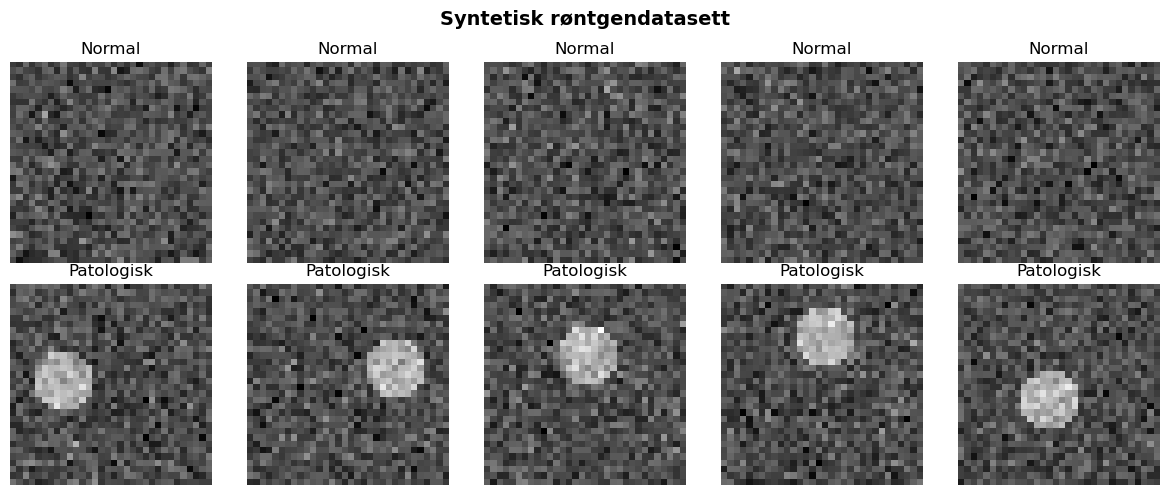

💡 Legg merke til de lysere 'lesjonene' i de patologiske bildene!


In [50]:
# === Visualiser eksempler fra datasettet ===
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
fig.suptitle('Syntetisk røntgendatasett', fontsize=14, fontweight='bold')

# Vis 5 normale
for i in range(5):
    bilde, merkelapp = datasett[i]
    axes[0, i].imshow(bilde.squeeze(), cmap='gray', vmin=0, vmax=1)
    axes[0, i].set_title('Normal' if merkelapp == 0 else 'Patologisk')
    axes[0, i].axis('off')

# Vis 5 patologiske
for i in range(5):
    bilde, merkelapp = datasett[100 + i]  # Fra andre halvdel
    axes[1, i].imshow(bilde.squeeze(), cmap='gray', vmin=0, vmax=1)
    axes[1, i].set_title('Normal' if merkelapp == 0 else 'Patologisk')
    axes[1, i].axis('off')

axes[0, 0].set_ylabel('Normale', fontsize=12)
axes[1, 0].set_ylabel('Patologiske', fontsize=12)
plt.tight_layout()
plt.show()

print("💡 Legg merke til de lysere 'lesjonene' i de patologiske bildene!")


### Eksempel 6: CNN for bildeklassifikasjon

Nå bygger vi et **Convolutional Neural Network (CNN)** som kan lære å skille normale fra patologiske bilder.


In [51]:
# === CNN for medisinsk bildeklassifikasjon ===

# Lightning import
try:
    import lightning.pytorch as pl
except ImportError:
    import pytorch_lightning as pl

class MedisinskBildeCNN(pl.LightningModule):
    """
    CNN for binær klassifikasjon av medisinske bilder.
    Arkitektur: Conv → Pool → Conv → Pool → FC → Output
    """
    def __init__(self):
        super().__init__()
        
        # Konvolusjonslag (feature extraction)
        self.features = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=1),  # 32x32 → 32x32
            nn.ReLU(),
            nn.MaxPool2d(2),                              # 32x32 → 16x16
            nn.Conv2d(16, 32, kernel_size=3, padding=1), # 16x16 → 16x16
            nn.ReLU(),
            nn.MaxPool2d(2),                              # 16x16 → 8x8
        )
        
        # Klassifikasjonslag
        self.klassifikator = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32 * 8 * 8, 64),
            nn.ReLU(),
            nn.Linear(64, 2)  # 2 klasser: normal/patologisk
        )
        
        self.tapsfunksjon = nn.CrossEntropyLoss()
    
    def forward(self, x):
        x = self.features(x)
        x = self.klassifikator(x)
        return x
    
    def training_step(self, batch, batch_idx):
        bilder, merkelapper = batch
        pred = self(bilder)
        tap = self.tapsfunksjon(pred, merkelapper)
        noyaktighet = (pred.argmax(dim=1) == merkelapper).float().mean()
        self.log('tap', tap, prog_bar=True)
        self.log('noyaktighet', noyaktighet, prog_bar=True)
        return tap
    
    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=0.001)

# Opprett modell og vis arkitektur
cnn_modell = MedisinskBildeCNN()
print("CNN-arkitektur:")
print(cnn_modell)


CNN-arkitektur:
MedisinskBildeCNN(
  (features): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (klassifikator): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2048, out_features=64, bias=True)
    (2): ReLU()
    (3): Linear(in_features=64, out_features=2, bias=True)
  )
  (tapsfunksjon): CrossEntropyLoss()
)


In [52]:
# === Tren CNN med Lightning ===
import platform

# Opprett DataLoader (num_workers=0 for macOS)
num_workers = 0 if platform.system() == 'Darwin' else 4
dataloader = DataLoader(datasett, batch_size=32, shuffle=True, num_workers=num_workers)

# Opprett trener
trener = pl.Trainer(
    max_epochs=20,
    enable_progress_bar=True,
    enable_model_summary=False,
    logger=False
)

# Tren modellen
print("Trener CNN på syntetiske røntgenbilder...")
trener.fit(cnn_modell, dataloader)
print("\n✅ Trening fullført!")


💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores


Output()

Trener CNN på syntetiske røntgenbilder...


`Trainer.fit` stopped: `max_epochs=20` reached.



✅ Trening fullført!


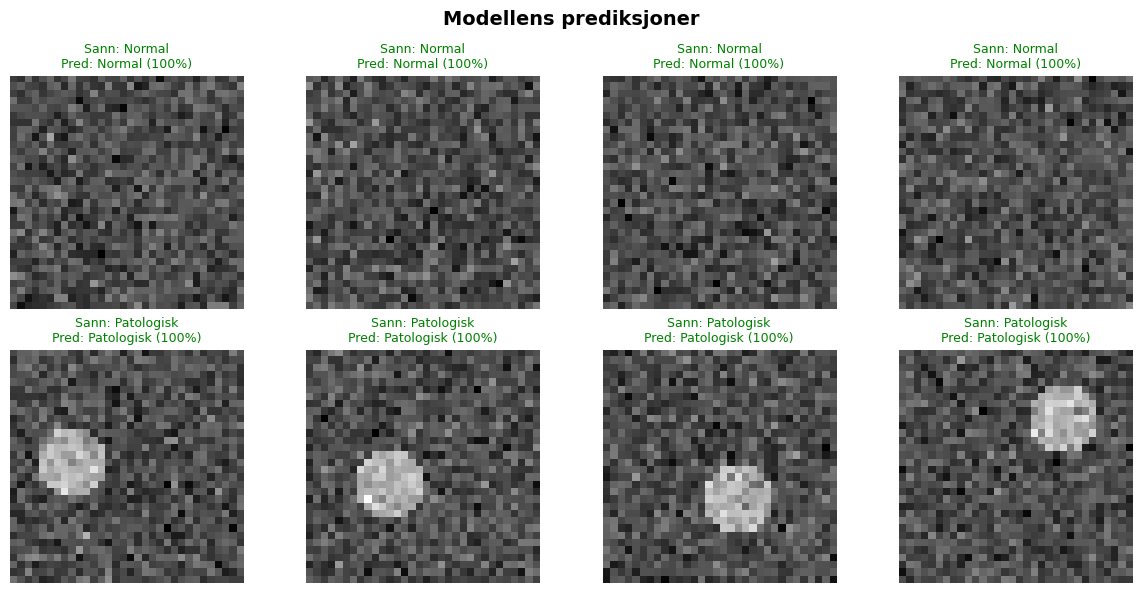


📊 Total nøyaktighet: 200/200 = 100.0%


In [53]:
# === Test modellen på nye bilder ===
cnn_modell.eval()

fig, axes = plt.subplots(2, 4, figsize=(12, 6))
fig.suptitle('Modellens prediksjoner', fontsize=14, fontweight='bold')

test_indices = [0, 5, 10, 15, 100, 105, 110, 115]  # Mix av normal/patologisk

for idx, ax in zip(test_indices, axes.flat):
    bilde, sann_merkelapp = datasett[idx]
    
    # Prediksjon
    with torch.no_grad():
        output = cnn_modell(bilde.unsqueeze(0))
        sannsynligheter = torch.softmax(output, dim=1)
        prediksjon = output.argmax(dim=1).item()
    
    # Vis bilde
    ax.imshow(bilde.squeeze(), cmap='gray', vmin=0, vmax=1)
    
    # Farge basert på korrekt/feil
    farge = 'green' if prediksjon == sann_merkelapp else 'red'
    sann_tekst = 'Normal' if sann_merkelapp == 0 else 'Patologisk'
    pred_tekst = 'Normal' if prediksjon == 0 else 'Patologisk'
    konfidens = sannsynligheter[0, prediksjon].item()
    
    ax.set_title(f'Sann: {sann_tekst}\nPred: {pred_tekst} ({konfidens:.0%})', 
                 color=farge, fontsize=9)
    ax.axis('off')

plt.tight_layout()
plt.show()

# Beregn total nøyaktighet
korrekte = 0
for i in range(len(datasett)):
    bilde, merkelapp = datasett[i]
    with torch.no_grad():
        pred = cnn_modell(bilde.unsqueeze(0)).argmax(dim=1).item()
    if pred == merkelapp:
        korrekte += 1

print(f"\n📊 Total nøyaktighet: {korrekte}/{len(datasett)} = {korrekte/len(datasett):.1%}")


---

## Del 2: CNN på 1D-signaler (EEG)

CNN fungerer ikke bare på bilder! Med **1D-konvolusjon** kan vi analysere tidsserie-data som:
- EKG (hjerterytme)
- EEG (hjerneaktivitet)
- Respirasjonssignaler

### Eksempel 7: Epilepsi-deteksjon fra EEG

Vi simulerer EEG-signaler og klassifiserer dem som **normale** eller **anfall**.


In [54]:
# === Syntetisk EEG-datasett ===
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt

class SyntetiskEEGDataset(Dataset):
    """
    Simulerer EEG-signaler (1D tidsserie, 256 samples ≈ 1.5 sek ved 173 Hz).
    - Normal: Rolig alfaaktivitet (~10 Hz sinusbølge + støy)
    - Anfall: Høyfrekvent spiking (~25 Hz) med uregelmessig amplitude
    """
    def __init__(self, n_samples=200, signal_lengde=256):
        self.signaler = []
        self.merkelapper = []
        t = np.linspace(0, 1.5, signal_lengde)
        
        for i in range(n_samples):
            if i < n_samples // 2:
                # Normal: rolig alfa-rytme
                signal = 0.5 * np.sin(2 * np.pi * 10 * t) + 0.1 * np.random.randn(signal_lengde)
                merkelapp = 0
            else:
                # Anfall: høyfrekvent, uregelmessig aktivitet
                signal = (0.8 * np.sin(2 * np.pi * 25 * t) * (1 + 0.5 * np.sin(2 * np.pi * 3 * t))
                         + 0.3 * np.random.randn(signal_lengde))
                merkelapp = 1
            
            self.signaler.append(torch.tensor(signal, dtype=torch.float32).unsqueeze(0))
            self.merkelapper.append(merkelapp)
    
    def __len__(self):
        return len(self.signaler)
    
    def __getitem__(self, idx):
        return self.signaler[idx], self.merkelapper[idx]

# Opprett datasett
eeg_datasett = SyntetiskEEGDataset(n_samples=200)
print(f"EEG-datasett: {len(eeg_datasett)} signaler, form: {eeg_datasett[0][0].shape}")


EEG-datasett: 200 signaler, form: torch.Size([1, 256])


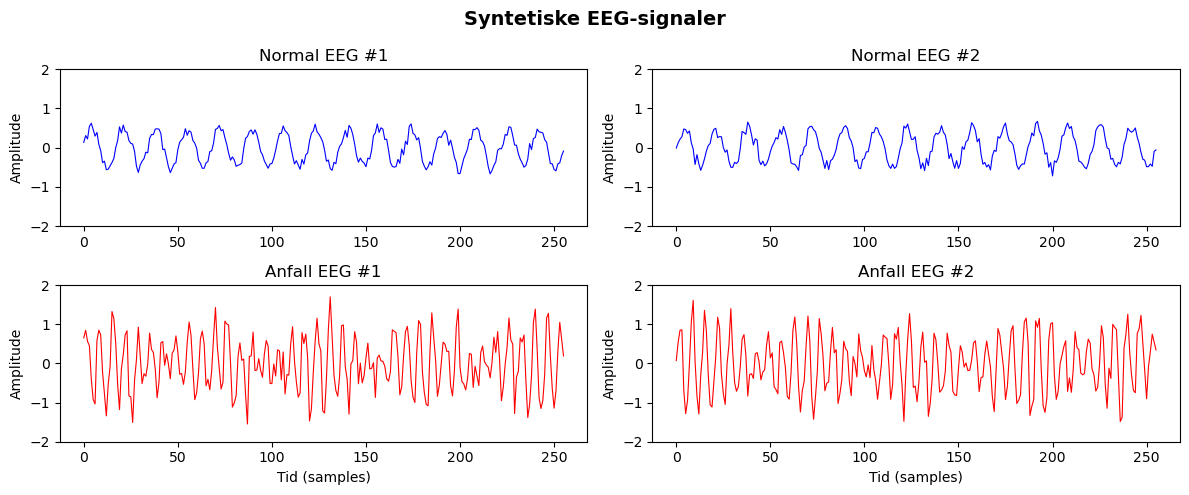

🧠 Normal: Jevn ~10 Hz alfaaktivitet
⚡ Anfall: Høyfrekvent (~25 Hz), uregelmessig amplitude


In [55]:
# === Visualiser EEG-eksempler ===
fig, axes = plt.subplots(2, 2, figsize=(12, 5))
fig.suptitle('Syntetiske EEG-signaler', fontsize=14, fontweight='bold')

# Normale signaler
for i, ax in enumerate(axes[0]):
    signal, _ = eeg_datasett[i]
    ax.plot(signal.squeeze().numpy(), 'b-', linewidth=0.8)
    ax.set_title(f'Normal EEG #{i+1}')
    ax.set_ylabel('Amplitude')
    ax.set_ylim(-2, 2)

# Anfall-signaler
for i, ax in enumerate(axes[1]):
    signal, _ = eeg_datasett[100 + i]
    ax.plot(signal.squeeze().numpy(), 'r-', linewidth=0.8)
    ax.set_title(f'Anfall EEG #{i+1}')
    ax.set_xlabel('Tid (samples)')
    ax.set_ylabel('Amplitude')
    ax.set_ylim(-2, 2)

plt.tight_layout()
plt.show()

print("🧠 Normal: Jevn ~10 Hz alfaaktivitet")
print("⚡ Anfall: Høyfrekvent (~25 Hz), uregelmessig amplitude")


In [56]:
# === 1D-CNN for EEG-klassifikasjon ===
try:
    import lightning.pytorch as pl
except ImportError:
    import pytorch_lightning as pl

class EEGKlassifikator(pl.LightningModule):
    """
    1D-CNN for EEG-klassifikasjon.
    Bruker Conv1d i stedet for Conv2d!
    """
    def __init__(self):
        super().__init__()
        
        # 1D-konvolusjonslag
        self.features = nn.Sequential(
            nn.Conv1d(1, 16, kernel_size=5, padding=2),   # (1, 256) → (16, 256)
            nn.ReLU(),
            nn.MaxPool1d(4),                               # (16, 256) → (16, 64)
            nn.Conv1d(16, 32, kernel_size=5, padding=2),  # (16, 64) → (32, 64)
            nn.ReLU(),
            nn.MaxPool1d(4),                               # (32, 64) → (32, 16)
        )
        
        self.klassifikator = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32 * 16, 32),
            nn.ReLU(),
            nn.Linear(32, 2)  # Normal vs Anfall
        )
        
        self.tapsfunksjon = nn.CrossEntropyLoss()
    
    def forward(self, x):
        return self.klassifikator(self.features(x))
    
    def training_step(self, batch, batch_idx):
        signaler, merkelapper = batch
        pred = self(signaler)
        tap = self.tapsfunksjon(pred, merkelapper)
        noyaktighet = (pred.argmax(dim=1) == merkelapper).float().mean()
        self.log('tap', tap, prog_bar=True)
        self.log('nøyaktighet', noyaktighet, prog_bar=True)
        return tap
    
    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=0.001)

eeg_modell = EEGKlassifikator()
print("1D-CNN for EEG:")
print(f"  Conv1d: 1→16→32 kanaler")
print(f"  Input: (batch, 1, 256) → Output: (batch, 2)")


1D-CNN for EEG:
  Conv1d: 1→16→32 kanaler
  Input: (batch, 1, 256) → Output: (batch, 2)


In [57]:
# === Tren og evaluer EEG-modellen ===
import platform

eeg_dataloader = DataLoader(
    eeg_datasett, batch_size=32, shuffle=True,
    num_workers=0 if platform.system() == 'Darwin' else 4
)

trener = pl.Trainer(max_epochs=15, enable_progress_bar=True, 
                    enable_model_summary=False, logger=False)

print("Trener 1D-CNN på EEG-data...")
trener.fit(eeg_modell, eeg_dataloader)

# Evaluer
eeg_modell.eval()
korrekte = sum(1 for i in range(len(eeg_datasett)) 
               if eeg_modell(eeg_datasett[i][0].unsqueeze(0)).argmax().item() == eeg_datasett[i][1])

print(f"\n✅ Nøyaktighet: {korrekte}/{len(eeg_datasett)} = {korrekte/len(eeg_datasett):.1%}")


💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores


Output()

Trener 1D-CNN på EEG-data...


`Trainer.fit` stopped: `max_epochs=15` reached.



✅ Nøyaktighet: 200/200 = 100.0%


---

## Oppsummering

### Hva vi har lært i denne notebooken:

| Del | Datatype | CNN-type | Medisinsk anvendelse |
|-----|----------|----------|---------------------|
| **Del 1** | 2D bilder (32×32) | `Conv2d` | Røntgen, CT, MR-klassifikasjon |
| **Del 2** | 1D signaler (256 samples) | `Conv1d` | EEG, EKG, respirasjon |

### Nøkkelforskjeller: 2D vs 1D CNN

```
2D-CNN (bilder):         1D-CNN (signaler):
┌───────────┐            ┌─────────────────────┐
│  ■ ■ ■ ■  │            │ ～～～～～～～～～～ │
│  ■ ■ ■ ■  │   vs       └─────────────────────┘
│  ■ ■ ■ ■  │            
└───────────┘            Conv1d(in, out, kernel)
Conv2d(in, out, kernel)  MaxPool1d(size)
MaxPool2d(size)          
```

### Videre utforskning

- **Ekte data**: Last ned [Bonn EEG-datasettet](https://www.upf.edu/web/ntsa/downloads) for reelle epilepsi-signaler
- **Mer avansert**: Prøv LSTM eller Transformer-arkitekturer for tidsserie-data
- **Medisinsk AI**: Se [fastMONAI](https://github.com/MMIV-ML/fastMONAI) for 3D medisinsk bildeanalyse


---

## 🎯 Oppgaver

Prøv deg på disse oppgavene for å teste forståelsen din! Klikk på "Vis løsning" for å se løsningsforslag.

---

### Oppgave 1: Tensor-operasjoner

Lag en tensor som representerer **5 pasienter** med **4 blodprøveverdier** hver (Hb, leukocytter, trombocytter, CRP). Beregn deretter:
1. Gjennomsnittsverdien for hver blodprøvetype (over alle pasienter)
2. Normaliser dataene (trekk fra gjennomsnitt, del på standardavvik)

<details>
<summary>💡 Vis løsning</summary>

```python
import torch

# 5 pasienter × 4 blodprøveverdier
blodprover = torch.tensor([
    [14.0, 7.5, 250.0, 5.0],   # Pasient 1
    [12.5, 9.0, 180.0, 45.0],  # Pasient 2
    [15.2, 6.8, 300.0, 3.0],   # Pasient 3
    [11.0, 12.0, 150.0, 80.0], # Pasient 4
    [13.8, 8.2, 220.0, 12.0],  # Pasient 5
])

# 1. Gjennomsnitt per blodprøvetype (over pasienter, dim=0)
gjennomsnitt = blodprover.mean(dim=0)
print(f"Gjennomsnitt: Hb={gjennomsnitt[0]:.1f}, Leuk={gjennomsnitt[1]:.1f}, "
      f"Tromb={gjennomsnitt[2]:.1f}, CRP={gjennomsnitt[3]:.1f}")

# 2. Normaliser
std = blodprover.std(dim=0)
normalisert = (blodprover - gjennomsnitt) / std
print(f"\nNormaliserte data:\n{normalisert}")
```

</details>


---

### Oppgave 2: Modifiser nettverksarkitektur

Ta utgangspunkt i `EnkelKlassifikator`-klassen fra eksempel 2. Utvid den til å ha **3 skjulte lag** med henholdsvis 16, 8 og 4 nevroner, og bruk **ReLU**-aktivering mellom lagene.

<details>
<summary>💡 Vis løsning</summary>

```python
import torch
import torch.nn as nn

class UtvidetKlassifikator(nn.Module):
    def __init__(self, input_size=4):
        super().__init__()
        self.lag1 = nn.Linear(input_size, 16)
        self.lag2 = nn.Linear(16, 8)
        self.lag3 = nn.Linear(8, 4)
        self.output = nn.Linear(4, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.relu(self.lag1(x))
        x = self.relu(self.lag2(x))
        x = self.relu(self.lag3(x))
        x = self.sigmoid(self.output(x))
        return x

# Test modellen
modell = UtvidetKlassifikator()
print(f"Modellarkitektur:\n{modell}")
print(f"\nAntall parametre: {sum(p.numel() for p in modell.parameters())}")

# Test med dummy-data
test_input = torch.randn(3, 4)  # 3 pasienter, 4 features
output = modell(test_input)
print(f"\nInput form: {test_input.shape}")
print(f"Output form: {output.shape}")
```

</details>

---

### Oppgave 3: Eksperimenter med læringsrate

Bruk treningsløkken fra eksempel 3. Kjør trening med tre ulike læringsrater: `0.001`, `0.1` og `1.0`. 
Hva observerer du? Hvilken læringsrate gir best resultat?

<details>
<summary>💡 Vis løsning</summary>

```python
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Enkel modell
def lag_modell():
    return nn.Sequential(
        nn.Linear(4, 8),
        nn.ReLU(),
        nn.Linear(8, 1),
        nn.Sigmoid()
    )

# Syntetiske data
torch.manual_seed(42)
X = torch.randn(100, 4)
y = ((X[:, 0] + X[:, 1]) > 0).float().unsqueeze(1)

# Test ulike læringsrater
læringsrater = [0.001, 0.1, 1.0]
resultater = {}

for lr in læringsrater:
    torch.manual_seed(42)  # Samme startpunkt
    modell = lag_modell()
    optimizer = torch.optim.SGD(modell.parameters(), lr=lr)
    tap_funksjon = nn.BCELoss()
    
    tap_historie = []
    for epoch in range(100):
        pred = modell(X)
        tap = tap_funksjon(pred, y)
        tap_historie.append(tap.item())
        
        optimizer.zero_grad()
        tap.backward()
        optimizer.step()
    
    resultater[lr] = tap_historie
    print(f"LR={lr}: Slutt-tap = {tap_historie[-1]:.4f}")

# Visualiser
plt.figure(figsize=(10, 4))
for lr, tap in resultater.items():
    plt.plot(tap, label=f'LR={lr}')
plt.xlabel('Epoch')
plt.ylabel('Tap')
plt.title('Effekt av læringsrate')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Observasjon:
# - LR=0.001: Treg konvergens, men stabil
# - LR=0.1: God balanse mellom hastighet og stabilitet
# - LR=1.0: For høy - tapet kan oscillere eller eksplodere
```

</details>

---

### Oppgave 4: Endre CNN-arkitektur

I `MedisinskBildeCNN` fra eksempel 6, legg til et **tredje konvolusjonslag** med 64 filtre. Husk å oppdatere `self.fc`-laget tilsvarende.

*Hint: Etter et ekstra konvolusjonslag med stride=2, halveres dimensjonene igjen.*

<details>
<summary>💡 Vis løsning</summary>

```python
import torch
import torch.nn as nn
try:
    import lightning.pytorch as pl
except ImportError:
    import pytorch_lightning as pl

class DyperebildeCNN(pl.LightningModule):
    def __init__(self):
        super().__init__()
        # 3 konvolusjonslag
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1)  # 32→16
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1) # 16→8
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1) # 8→4
        self.relu = nn.ReLU()
        
        # Etter 3 konvolusjoner: 64 kanaler × 4 × 4 = 1024
        self.fc = nn.Linear(64 * 4 * 4, 2)
    
    def forward(self, x):
        x = self.relu(self.conv1(x))  # [B, 16, 16, 16]
        x = self.relu(self.conv2(x))  # [B, 32, 8, 8]
        x = self.relu(self.conv3(x))  # [B, 64, 4, 4]
        x = x.view(x.size(0), -1)     # [B, 1024]
        x = self.fc(x)                # [B, 2]
        return x
    
    def training_step(self, batch, batch_idx):
        x, y = batch
        pred = self(x)
        loss = nn.CrossEntropyLoss()(pred, y)
        return loss
    
    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=0.001)

# Verifiser dimensjoner
modell = DyperebildeCNN()
test_input = torch.randn(2, 1, 32, 32)  # 2 bilder
output = modell(test_input)
print(f"Input: {test_input.shape}")
print(f"Output: {output.shape}")
print(f"\nAntall parametre: {sum(p.numel() for p in modell.parameters()):,}")
```

</details>

---

### Oppgave 5: Fra 2D til 1D CNN

Konverter `MedisinskBildeCNN` til en **1D-CNN** som kan klassifisere EKG-signaler med lengde 200 (samplingspunkter). Modellen skal ha:
- Input: 200 samplingspunkter (1 kanal)
- 2 konvolusjonslag (16 og 32 filtre)
- Output: 3 klasser (normal, arytmi_A, arytmi_B)

<details>
<summary>💡 Vis løsning</summary>

```python
import torch
import torch.nn as nn
try:
    import lightning.pytorch as pl
except ImportError:
    import pytorch_lightning as pl

class EKGCNN(pl.LightningModule):
    def __init__(self, signal_lengde=200, n_klasser=3):
        super().__init__()
        # 1D konvolusjonslag (Conv1d)
        self.conv1 = nn.Conv1d(1, 16, kernel_size=5, stride=2, padding=2)   # 200→100
        self.conv2 = nn.Conv1d(16, 32, kernel_size=5, stride=2, padding=2)  # 100→50
        self.pool = nn.AdaptiveAvgPool1d(10)  # Reduser til fast størrelse
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)
        
        # Fullt tilkoblet lag
        self.fc = nn.Linear(32 * 10, n_klasser)
    
    def forward(self, x):
        # x: [batch, 1, 200]
        x = self.relu(self.conv1(x))   # [B, 16, 100]
        x = self.relu(self.conv2(x))   # [B, 32, 50]
        x = self.pool(x)               # [B, 32, 10]
        x = x.view(x.size(0), -1)      # [B, 320]
        x = self.dropout(x)
        x = self.fc(x)                 # [B, 3]
        return x
    
    def training_step(self, batch, batch_idx):
        x, y = batch
        pred = self(x)
        loss = nn.CrossEntropyLoss()(pred, y)
        acc = (pred.argmax(dim=1) == y).float().mean()
        self.log('train_acc', acc)
        return loss
    
    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=0.001)

# Test modellen
modell = EKGCNN()
print(f"Modell:\n{modell}")

# Syntetisk EKG-batch
ekg_batch = torch.randn(8, 1, 200)  # 8 EKG-signaler
output = modell(ekg_batch)

print(f"\nInput form: {ekg_batch.shape}")
print(f"Output form: {output.shape}")
print(f"Prediksjoner: {torch.softmax(output[0], dim=0)}")
print(f"\nAntall parametre: {sum(p.numel() for p in modell.parameters()):,}")
```

</details>

---

### 🏆 Gratulerer!

Du har nå gjennomført oppgavene for PyTorch og Lightning. Hvis du vil utforske mer:

- **A3-A6**: Praktiske MNIST-eksempler med økende kompleksitet
- **B1-B4**: Nevrale nettverk og medisinsk klassifikasjon
- **C1-C4**: Dypere CNN-forståelse med bildeklassifikasjon

> 💡 **Tips**: Prøv å kombinere det du har lært – f.eks. bruk Lightning på MNIST-datasettet fra A3!